# Clustering - Workforce Diversity Outcomes Record Dataset

## 1. Introduction

Clustering is a type of unsupervised machine learning algorithm that consists of grouping feature data points together based on their similarities. In addition, unsupervised machine learning is a broad group of algorithms that mimic patterns in data without any target variables or labels present. In this part of my project, I will apply three common clustering methods –– K-means, DBSCAN, and hierarchical clustering –– to my workforce diversity outcomes record dataset. 

Since clustering is unsupervised, I am most concerned with the feature variables, or X. For my record dataset, the X variables are the categorical variables seniority, job category, gender, and ethnicity, as well as the continuous variables salary, outflow, inflow, and count. I will verify the accuracy of each model by comparing the predicted clusters and target company labels.  

## 2. Theory

Before we dive into the analysis, let's examine what each of the three clustering methods are.


### Clustering Method 1: K-means

K-means clustering is the simplest clustering method and is best used for neatly grouped data points. This method involves grouping data points into clusters based on Euclidean distance. This algorithm selects data points based on an input k number of clusters. For example, if you give the input k = 5, that means you want to find 5 clusters. After inputting the number k, the algorithm selects an initial k number of data points in the dataset. This initial set of k data points forms the initial centroids, or centers of clusters. 

The algorithm calculates the distance between one random data point and each of the selected centroids. For that random data point, K-means picks the closest centroid, and assigns the data point to that centroid's cluster. The algorithm repeats this process of computing the distance and picking the closest centroid for the rest of the data points. After going through all data points, the algorithm sums up the variance of each of the clusters and stores it. 

After the initial set of centroids, K-means algorithm randomly selects another set of centroids and repeats the process. It calculates the distances between each data point and each centroid, and then sums up the variance of each cluster. The algorithm repeats this process however many times you specify it to, such as in max_iter parameter in the KMeans function.

There are several ways to tune the accuracy of the K-means model, namely adjust the k parameter. The "elbow plot" method is a common model tuning method that plots the reduction in variation against the number of clusters (k). The optimal number of clusters (k) is where there is an "elbow", which means an inflection or sharp reduction in variation, after which the variation reduces much more slowly. The second common method is silhouette analysis, which measures the silhouette coefficient for each value of K. The coefficient compares the similarity between each data point within its cluster with other clusters. The k value that gives the highest silhouette coefficient is the optimal k value. 


### Clustering Method 2: DBSCAN

DBSCAN, an abbreviation of density-based spatial clustering of applications with noise, is a clustering method that uses density to identify clusters. Unlike K-means, DBSCAN can handle more complicated, nested clusters that involve many features. 

DBSCAN operates by first counting the number of points close to each data point (let's call these "core points"), within a circle with a given radius. Then, DBSCAN selects core points that have at least a given number of core points within their own circles. 

After selecting data points that have at least a certain number of core points next to them, DBSCAN assigns one of those points to start a cluster. DBSCAN adds nearby core points to that cluster and keeps going until there are no more core points to add. Then, DBSCAN adds nearby non-core points (points that don't meet the threshold of having a minimum number of core points next to them, but still within the radius of another core point) to that same cluster. 

DBSCAN repeats the process for the remaining core points that are not in the first cluster. That means that DBSCAN picks a random core point to start a second cluster, adds nearby core points to that cluster, then adds nearby non-core points to that cluster. 

The remaining non-core points that are not in any of the created clusters are then considered outliers. 

You can improve the accuracy of a DBSCAN algorithm by tuning several hyperparameters, including the following: the radius of each core point and the number of close points for a core point. In Sklearn.cluster.DBSCAN, You can tune the radius of each point by adjusting the eps parameter. In the same function, you can tune the number of close points for a core point using the min_samples parameter; note that this number includes the point itself. 


### Clustering Method 3: Hierarchical Clustering

Hierarchical clustering is a broad group of clustering methods. There are two types of hierarchical clustering: divisive (top-down) and agglomerative (bottom-up). 

Divisive starts with a big group, and separate data into smaller clusters. Agglomerative starts with individual case, and pairs them up by similarity. Unlike K-means and DSCAN clustering methods, hierarchical clustering does not help you decide on how to cluster groups, so it is up to you to decide on the set of clusters based on the hierarchy derived. 

A dendrogram is often used to visualize hierarchical clustering. The height of each arm connecting two clusters shows how dissimilar the two clusters are. A short bar connecting two clusters means they are close, while a tall bar connecting two clusters means they are farther apart. You can clearly see what clusters will form on a dendrogram by drawing a straight line across the whole graph; the number of arms emerging immediately under the line gives you the number of clusters, and each set of groups under each arm gives you the resulting distinct clusters. 

## 3. Methods

### 3.1 Data Selection

As done for previous models for the record data, I chose demographic and workforce data of the six companies as X. The data were cleaned in R at the beginning of the project and saved into the cleaned_wf_demo.csv file, which I will be loading in this part of the project.

In the following, I convereted categorical variables into dummy variables using cat.codes. Also, I normalized the continuous variables count, inflow, outflow, and salary using StandardScaler() from Sklearn so that I can minimize distortion and maximize consistency. I saved the new X with categorical variables and normalized continuous variables in its own dataset so that I can use the normalized data to train other models in other parts of the project.

In [1]:
## CONVERT TO CATEGORY DATATYPE

# Load essential libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Read csv file
df = pd.read_csv('../data/cleaned_wf_demo.csv', index_col=0)

# Convert relevant columns to categorical datatype
df['ethnicity'] = df['ethnicity'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['job_category'] = df['job_category'].astype('category').cat.codes

# Confirm df
df.head(5)

,company,seniority,job_category,gender,ethnicity,count,inflow,outflow,salary
1,Home Depot,4,0,0,0,6.649361,0.027259,0.020727,6.296236e+05
2,Home Depot,3,7,1,0,0.114460,0.000265,0.000297,8.108699e+03
3,Home Depot,5,6,1,0,0.005991,0.001000,0.000000,5.206698e+02
4,Home Depot,1,1,1,0,192.650237,10.110865,6.249455,1.124800e+07
5,Home Depot,3,1,0,0,84.062919,1.707721,1.253758,8.842880e+06


In [2]:
## STANDARDIZE

# Load libraries for standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Drop company column from df for X, as well as gender and ethnicity columns with strings
X = df.copy()
X = X.drop(['company'], axis=1)

# Scale continuous variables in X
X['salary'] = StandardScaler().fit_transform(np.array(X['salary']).reshape(-1,1))
X['count'] = StandardScaler().fit_transform(np.array(X['count']).reshape(-1,1))
X['inflow'] = StandardScaler().fit_transform(np.array(X['inflow']).reshape(-1,1))
X['outflow'] = StandardScaler().fit_transform(np.array(X['outflow']).reshape(-1,1))

# Save standardized X to new dataset
X.to_csv('../data/Workforce_X_Standardized.csv')

# Read the standardized X dataset
X = pd.read_csv('../data/Workforce_X_Standardized.csv', index_col=0)
X.head()

,seniority,job_category,gender,ethnicity,count,inflow,outflow,salary
1,4,0,0,0,-0.155382,-0.136760,-0.144712,-0.214896
2,3,7,1,0,-0.164201,-0.138127,-0.146028,-0.228569
3,5,6,1,0,-0.164347,-0.138089,-0.146047,-0.228736
4,1,1,1,0,0.095629,0.373655,0.256436,0.018696
5,3,1,0,0,-0.050911,-0.051698,-0.065302,-0.034214


### 3.2 Feature Selection

When I trained the supervised machine learning models, I ran feature selection and decided to drop count, inflow, and outflow features because they were too closely correlated, which means they might not yield meaningful predictions. However, after reflecting on my decision, I realized that these variables had a strong correlation to each other compared to the other variables because the other variables are categorical, which distorted the correlation matrix. Also, this dataset's categorical variables' correlations with each other do not show anything meaningful, because there can only be 1 category under each group, so there will always be a negative correlation between each category and other categories. For example, in this dataset, "gender" can only be "male" OR "female", and the corresponding values 0 and 1 do not show anything meaningful except for the categories they represent. 

As a result, I ran a correlation matrix analysis on the continuous variables only. I ran the feature selection to confirm that the correlation of the features is strong along the diagonal and not very strong in other parts of the matrix. As shown in the correlation matrix below, each continuous feature is not very closely correlated to other features, confirming the current feature selection.

(4, 4)


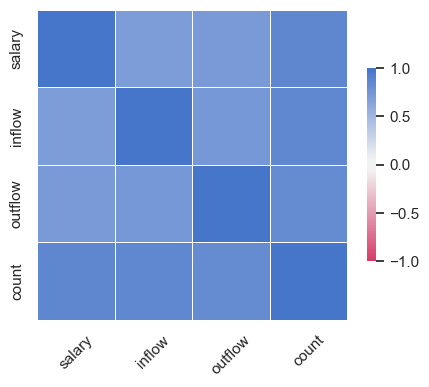

In [3]:
# Identify feature and target columns 
feature_cols = ['salary', 'inflow', 'outflow', 'count']

# Display heat-map for the correlation matrix
# Use X[feature_cols] instead of df[feature_cols] since we want to reference back to X
corr = X[feature_cols].corr(); 
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(5,5))  # Set up the matplotlib figure
cmap = sns.diverging_palette(0, 255, sep=15, n=16, as_cmap=True) # Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45)

plt.show()

### 3.3 Hyperparameter Tuning and Final Results for each Clustering Method

#### 3.3.1 K-means Clustering
I calculated the distortion and inertia of various k values. Using the elbow method, it looks like k = 6 gives the optimal k value, after which the drop in inertia slows down.

array([<AxesSubplot:xlabel='Cluster'>, <AxesSubplot:xlabel='Cluster'>],
      dtype=object)

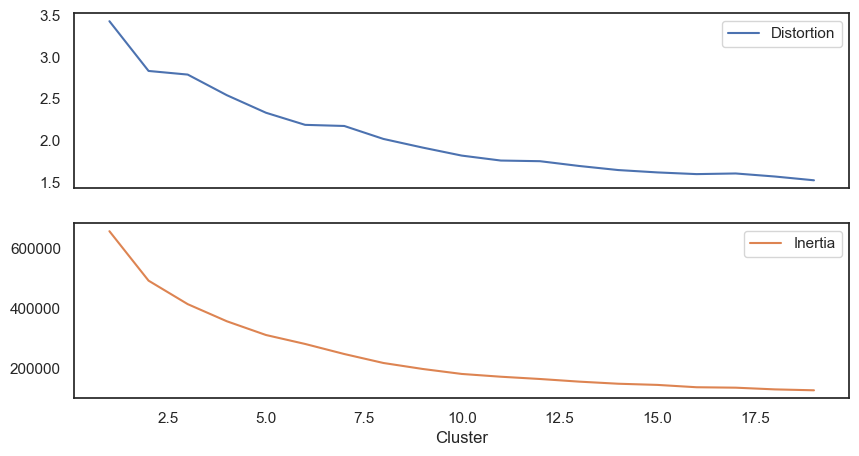

In [4]:
##### K-MEANS CLUSTERING #####

# Import relevant libraries for K-Means clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Evaluate the optimal number of clusters using the elbow method 
distortions = []
inertias = []
k = 20

for k in range(1,k):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster': np.arange(1, k+1), 'Distortion': distortions, 'Inertia': inertias})

evaluation

# Plot distortion and inertia elbow plot for kmeans
evaluation.plot.line(x = 'Cluster', subplots=True, figsize=(10, 5))

<AxesSubplot:xlabel='salary', ylabel='outflow'>

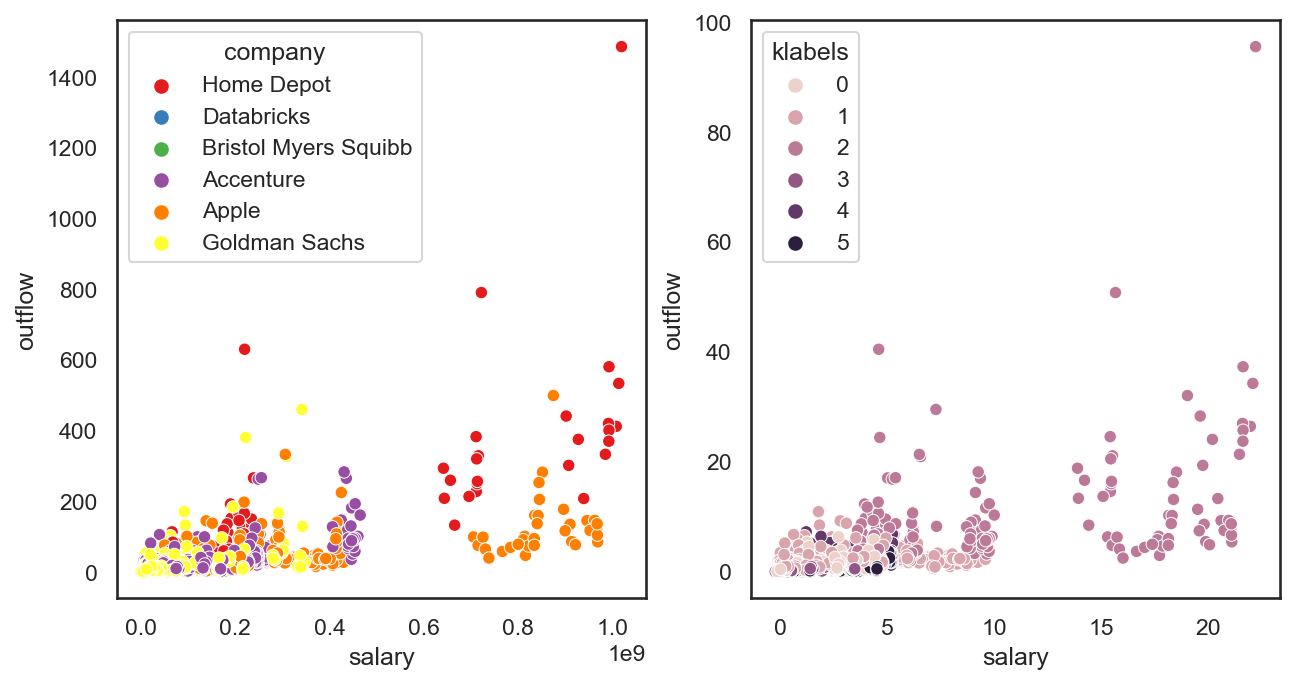

In [5]:
# Choose k=6 as the optimal number of clusters

# Show various lengths
sns.set_theme(style = 'white', palette='Set1')
bestK = KMeans(n_clusters=6, init='k-means++', random_state=0, max_iter=500)
labels4 = bestK.fit_predict(X)
X['klabels'] = labels4

# Plot actual clusters and K-means clusters
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 150)
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'company', data = df, ax = ax[0])
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'klabels', data = X, ax = ax[1])

#### 3.3.2 DBSCAN 

For DBSCAN, I selected the appropriate eps and min_samples values that produced 6 labels, which is the same number of labels as the number of companies––our true labels. The graphs below shows the true labels at the left and predicted density clusters at the right.  

<AxesSubplot:xlabel='salary', ylabel='outflow'>

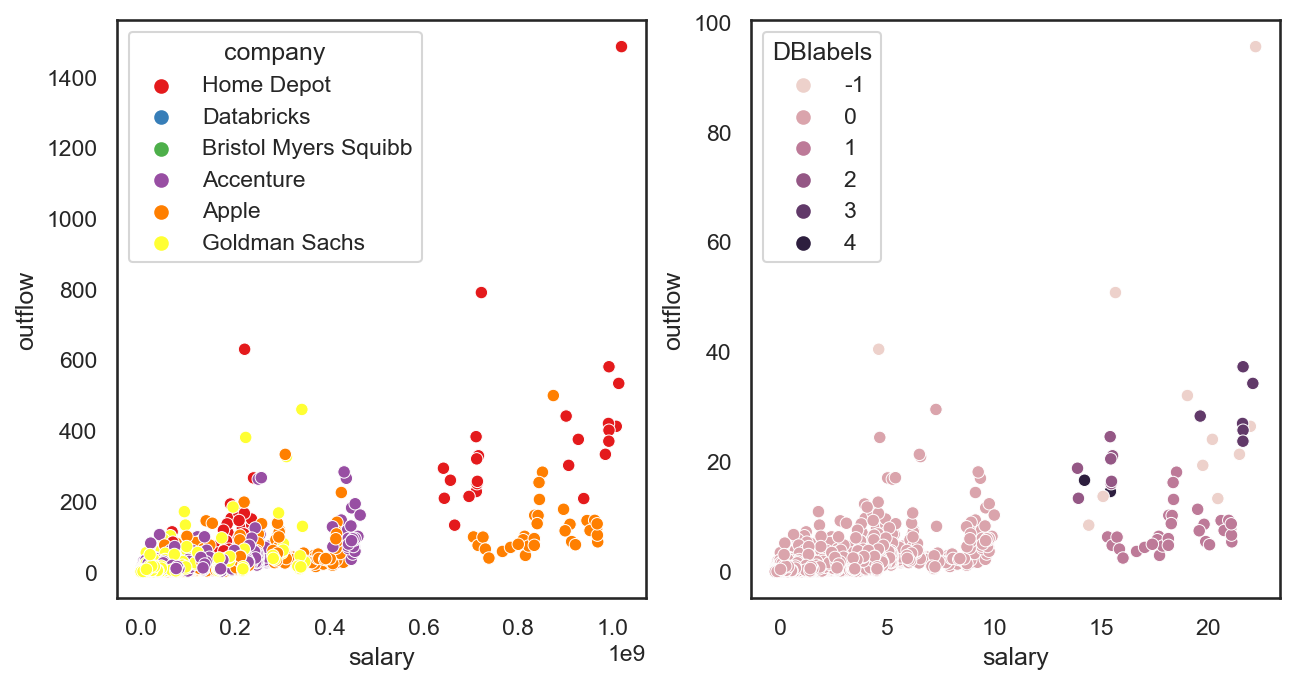

In [6]:
###### DBSCAN ######

# Import necessary library for DBSCAN clustering
# . plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
from sklearn.cluster import DBSCAN

# Use the eps and min_samples parameters to find the optimal number of clusters
model = DBSCAN(eps = 8, min_samples = 2).fit(X)
labels_DB = model.labels_
X['DBlabels'] = labels_DB

# Plot actual labels vs DBSCAN labels
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 150)
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'company', data = df, ax = ax[0])
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'DBlabels', data = X, ax = ax[1])

#### 3.3.3 Hierarchical Clustering

For hierarchical clustering, I chose the agglomerative clustering method, which ended up producing 2 labels. The dendrogram shows the hierarchy of labels. Based on the dendrogram only, it would make the most sense to put y=300 because that produces 6 categories, which is the same number as the 6 companies we have in our label. 

In [7]:
###### HIERARCHICAL CLUSTERING ######

# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering( ).fit(X)
HClabels = model.labels_
X['HClabels'] = HClabels


<AxesSubplot:xlabel='salary', ylabel='outflow'>

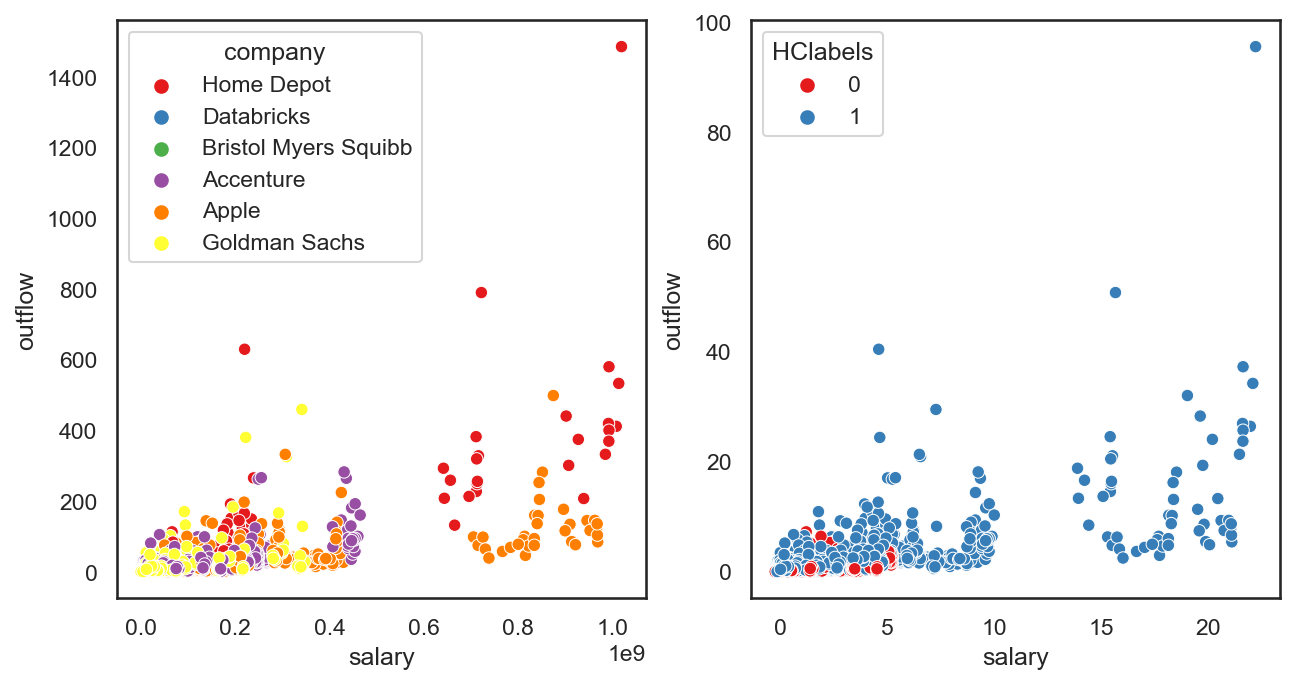

In [8]:
from matplotlib import pyplot as plt

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 150)
sns.scatterplot(x='salary', y='outflow', hue='company', data=df, ax=ax[0])
sns.scatterplot(x='salary', y='outflow', hue='HClabels', data=X, ax=ax[1])


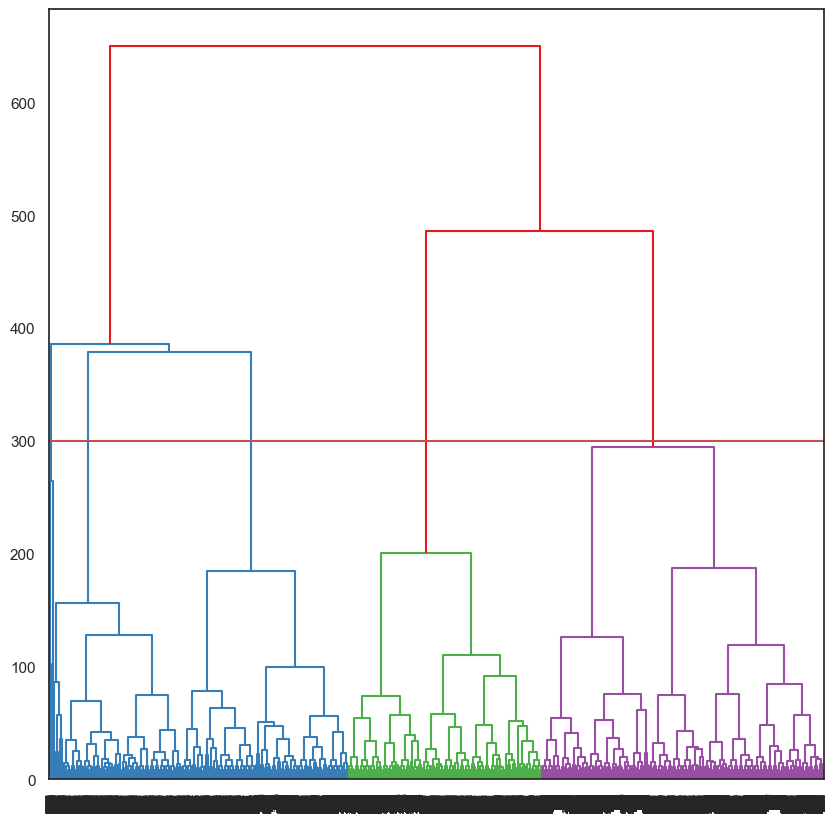

In [9]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
plt.figure(figsize=(10, 10))
Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=300, color='r', label='21')

## 4. Results

The below visualization shows the clusters of the true labels and K-means, DBSCAN, and hierarchical clusters. 

It looks like the K-means method seemed to work the best for the left half of the plot, while DBSCAN captures the right half more accurately. K-means shows at least 3 different clusters where salary is roughly 0-10 (the left half of the graph), vaguely corresponding to the actual labels where there are several clusters in the left half of the graph. However, in the right half K-means groups the sparse data points in their own cluster, which differs from the true labels where there are two distinct clusters. The second method, DBSCAN, labels the data points in the left half of the graph all in the same cluster. That means the clusters in the left half not accurate. However, DBSCAN captures some groups of clusters in the right half of the graph rather accurately in ways that the other methods have not been able to, perhaps because those data points are relatively nested and nested clusters are well-captured by DBSCAN. Finally, the hierarchical method shows two groups of clusters in the bottom right, but labels data points in the far right as the same cluster. 

The clustering results provided some new insights into the data: it looks like of the six companies, generally salary is slightly positively correlated with outflow. That means as salary increases, outflow increases marginally too. In addition, the results show that there are some noticeable company patterns in all X features. Home Depot, notably, has several "outliers" that were easily grouped together by all methods, in particular by k-means and hierarchical clustering. Home Depot's data seems to deviate from other companies' trends in that Home Depot has employees with lower salary and high outflow, as well as employees with high salary and very high outflow. 

Text(0.5, 1.0, 'Hierarchical')

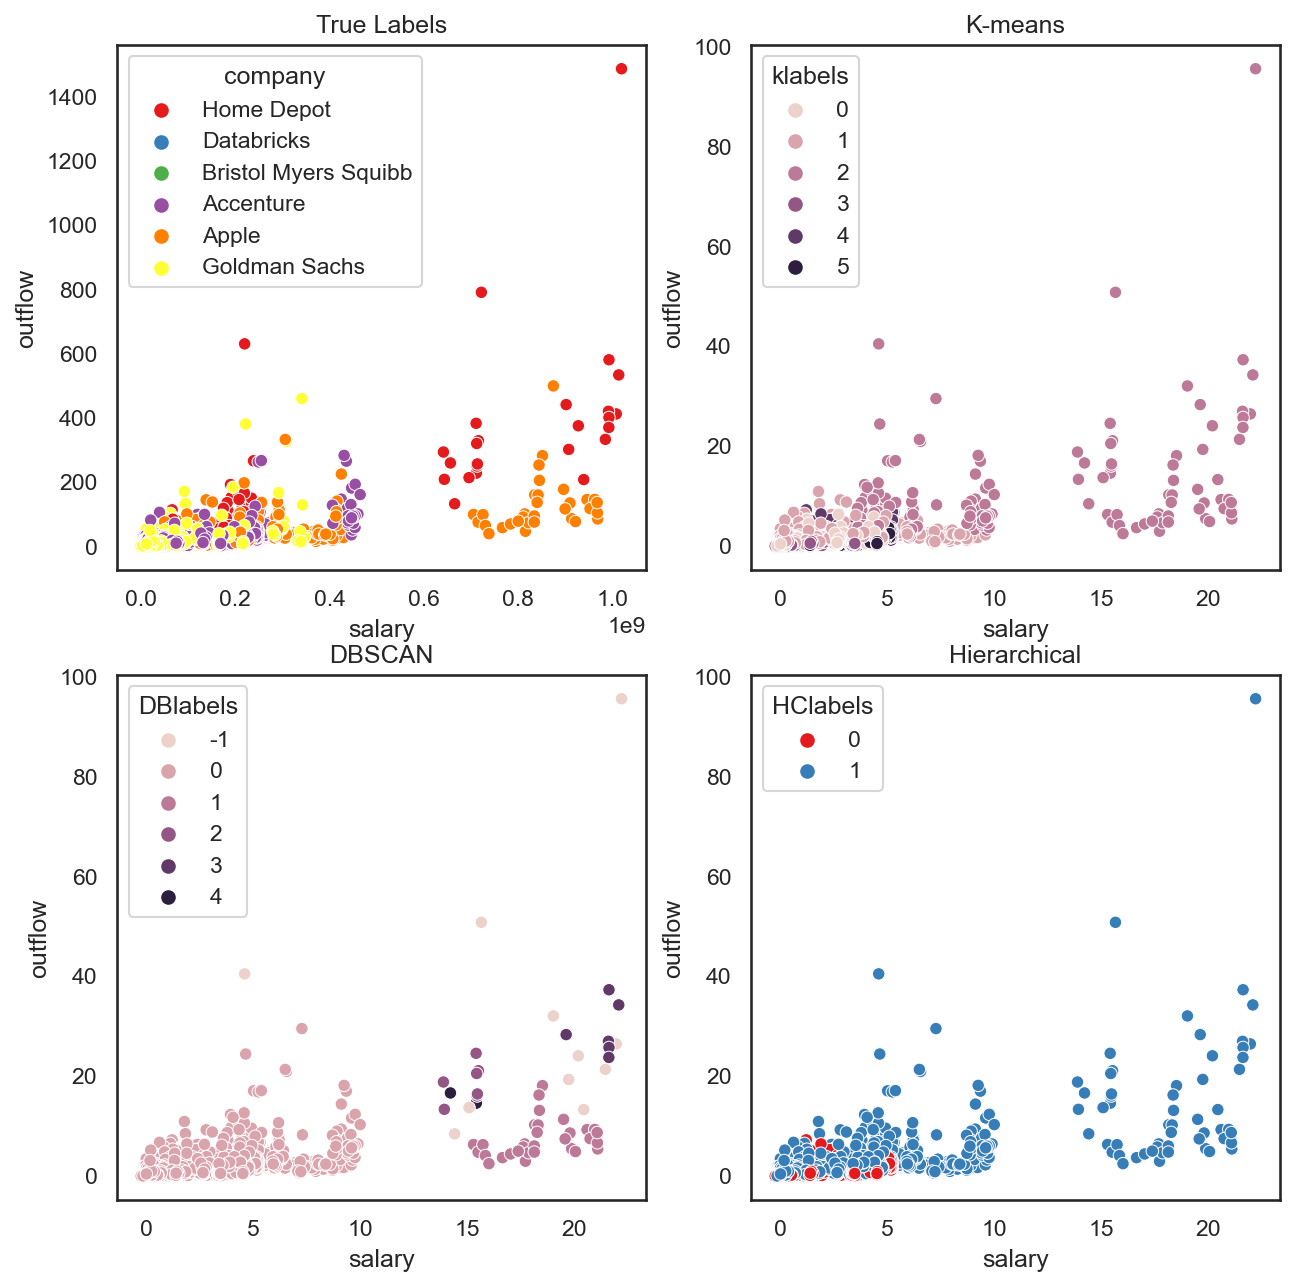

In [10]:
# Generate plot structure
fig, ax = plt.subplots(2, 2, figsize=(10, 10), dpi = 150)

# True labels
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'company', data = df, ax = ax[0,0])
ax[0,0].set_title('True Labels')

# K-means
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'klabels', data = X, ax = ax[0,1])
ax[0,1].set_title('K-means')

# DBSCAN
sns.scatterplot(x = 'salary', y = 'outflow', hue = 'DBlabels', data = X, ax = ax[1,0])
ax[1,0].set_title('DBSCAN')

# Hierarchical
sns.scatterplot(x='salary', y='outflow', hue='HClabels', data= X, ax=ax[1,1])
ax[1,1].set_title('Hierarchical')


## 5. Conclusion

Compared to the supervised learning algorithms (Naive Bayes, Decision Trees, and SVM), clustering algorithms are unsupervised, which means they do not take the target variable into account when building the model. As a result, it is expected that none of the clustering models seemed to have worked particularly well. Out of all three methods, k-means did the best in terms of predicitng the nuanced clusters in the lower half of the normalized salary range, while DBSCAN did the best in predicting nuances in the upper half of the normalized salary range. Still, overall, this analysis confirms my understanding that clustering algorithms cannot predict labels very accurately since the target variable is not fed into the model and each company's salary and outflow features are not extremely distinct from each other. 

Clustering the data has shown that there are distinct differences in companies' salary and outflow features. Generally higher salaries give a higher probability of leaving the company. This makes sense in real life, because the more you are earning in a company, the more likely a person is skilled and valued in what they do. This perhaps means the more job options the person has, which would lead them to leave the company. For further exploration, I think it would be interesting to explore relationships between salary/outflow and categorical features like ethnicity and gender as well as deviations in Home Depot's data. 

## 6. Works Cited

365 Data Science. “Flat and Hierarchical Clustering | the Dendrogram Explained.” YouTube, YouTube, 15 Jan. 2019, https://www.youtube.com/watch?v=ijUMKMC4f9I. 

Starmer, Josh. “StatQuest: K-Means Clustering.” YouTube, StatQuest. with Josh Starmer, 23 May 2018, https://www.youtube.com/watch?v=4b5d3muPQmA. 

Jovanović, Vitomir. “DBScan Clustering Algorithm - an Easy Way for Find More Complex Hidden Patterns of the Data.” Medium, Medium, 21 Feb. 2022, https://medium.com/@vitomirj/dbscan-clustering-algorithm-309e5616c3d7. 

Starmer, Josh. “Clustering with DBSCAN, Clearly Explained!!!” YouTube, StatQuest with Josh Starmer, 10 Jan. 2022, https://www.youtube.com/watch?v=RDZUdRSDOok. 